In [1]:
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")

using Plots
pyplot();
using RobotOS
using RiskSensitiveSAC

include(joinpath(@__DIR__, "..", "scripts", "default_params", "params_cost.jl"));
include(joinpath(@__DIR__, "..", "scripts", "default_params", "params_control.jl"));

┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: GeForce RTX 2080 Ti
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/env_trajectron++/bin/python3.6
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:41


In [2]:
cost_param = CostParameter(Cep, Cu, β_pos, α_col, β_col, λ_col, σ_risk);

In [3]:
target_trajectory = Trajectory2D([WayPoint2D([0.0, 0.0], Time(0.0))]);

In [4]:
i_array = 0.:0.1:5.0;

apvec = [0.0, 0.0];
e_state_array = [RobotState([ii, 0.0, 0.0, 0.0], Time(0.0)) for ii in i_array];
u_array = [[u_norm_max, 0.0] for ii in i_array];

pos_cost_array = [instant_position_cost(e_state, target_trajectory, cost_param) for e_state in e_state_array];
col_cost_array = [instant_collision_cost(e_state, apvec, cost_param) for e_state in e_state_array];
cnt_cost_array = [instant_control_cost(u, cost_param) for u in u_array];

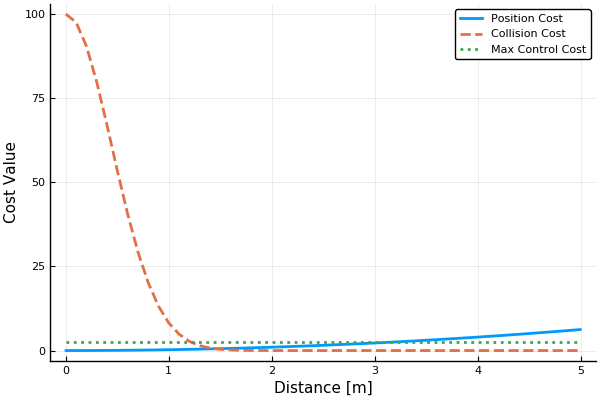

In [5]:
plot(i_array, pos_cost_array, label="Position Cost", linewidth=2.0)
plot!(i_array, col_cost_array, label="Collision Cost", linewidth=2.0, linestyle=:dash)
plot!(i_array, cnt_cost_array, label="Max Control Cost", linewidth=2.0, linestyle=:dot,
      xlabel="Distance [m]", ylabel="Cost Value")